# Supermarket sales
## Exploratory Data Analysis (EDA)

### Historical record of sales data in 3 different supermarkets

### About Dataset
##### Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

#### Attribute information
Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Data Exploration

In [191]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Dataset
db = pd.read_csv('supermarket_sales.csv')

In [5]:
#Validating the dimension of our dataset
db.shape
#Se tiene 1000 filas y 17 variables

(1000, 17)

In [6]:
#We check the first 5 records
db.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
#Validating the type of earch variable of our dataset
db.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

The variable "Date" must be a data. Let's change it!

In [37]:
#Changing the type of variable "Date" and 'Time'
db['Date'] = pd.to_datetime(db['Date'])
db['Time'] = pd.to_datetime(db['Time'])

In [11]:
db.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

- We realize that the variable "gross margin percentage" has 1 unique value: 4.761905, so it is a constant. That is why we will drop it.

In [35]:
#Now, we can see basic information of each column
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Date           1000 non-null   datetime64[ns]
 11  Time           1000 non-null   object        
 12  Payment        1000 non-null   object        
 13  cogs           1000 non-null   float64       
 14  gross income   1000 non-null   float64       
 15  Rating         1000 no

In [16]:
db.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We conclude that there are no nulls.

## Data Cleaning
#### Let's check the composition of each variable

In [19]:
#We are going to start dropping the variable "gross margin percentage"
db =  db.drop(columns = ['gross margin percentage'])

In [20]:
list(db.columns)

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross income',
 'Rating']

## Quantitative variables

In [62]:
# We list categorical variables
db.select_dtypes(['float64','int64']).columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating'],
      dtype='object')

### Unit price

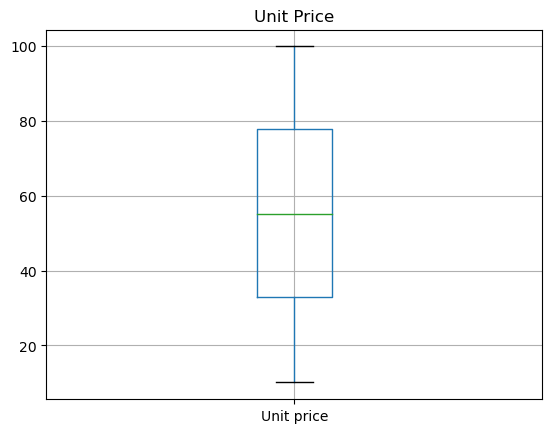

In [25]:
db.boxplot(column = ['Unit price'])
plt.title('Unit Price')
plt.show()

We see that there are no outliers that exceed the interquartile ranges

### Quantity

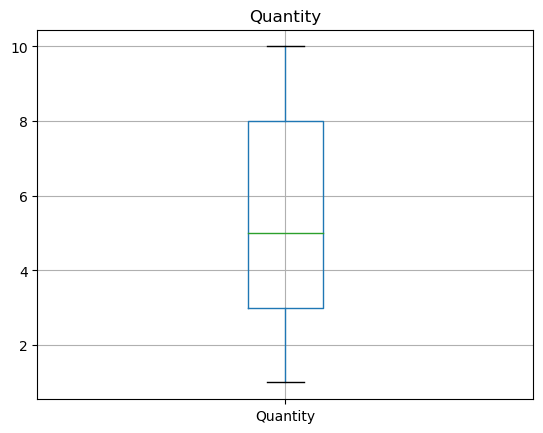

In [30]:
db.boxplot(column = ['Quantity'])
plt.title('Quantity')
plt.show()

we see that there are no outliers that exceed the interquartile ranges

### Tax 5%

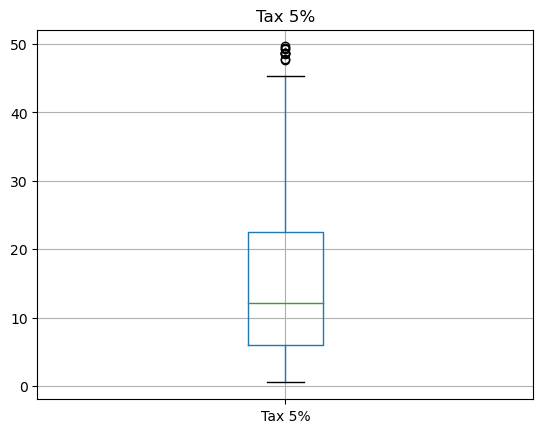

In [33]:
db.boxplot(column = ['Tax 5%'])
plt.title('Tax 5%')
plt.show()

In [47]:
q1 = db['Tax 5%'].quantile(0.25)
q3 = db['Tax 5%'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

# Calculating the number of outliers
q_outliers = db.loc[(db['Tax 5%'] > (q3 + 1.5*iqr)) | (db['Tax 5%'] < (q1 - 1.5*iqr))].shape[0]

# We replace the outliers greater than q3+15iqr, with the value of q3
db.loc[db['Tax 5%'] > (q3 + 1.5*iqr), 'Tax 5%'] = q3

# We replace the outliers less than q1-15iqr, with the value of q1
db.loc[db['Tax 5%'] < (q1 - 1.5*iqr), 'Tax 5%'] = q1

print(f'They were modified {q_outliers} outliers.')

They were modified 9 outliers.


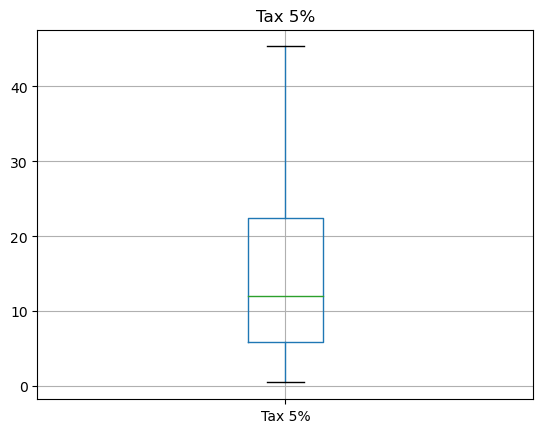

In [48]:
db.boxplot(column = ['Tax 5%'])
plt.title('Tax 5%')
plt.show()

In [ ]:
There were 9 outliers, so these were transformed into q1 and q3 as appropriate.

### Total

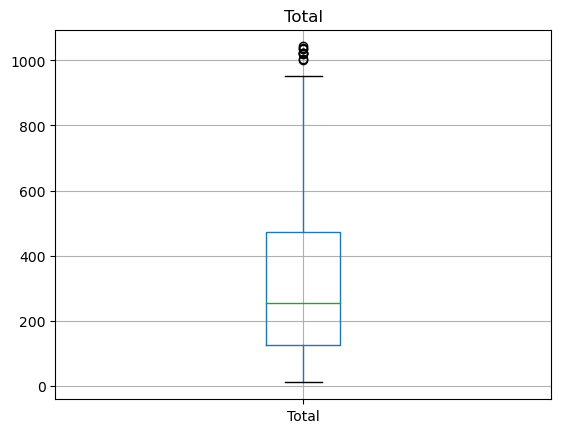

In [34]:
db.boxplot(column = ['Total'])
plt.title('Total')
plt.show()

In [50]:
q1 = db['Total'].quantile(0.25)
q3 = db['Total'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

# Calculating the number of outliers
q_outliers = db.loc[(db['Total'] > (q3 + 1.5*iqr)) | (db['Total'] < (q1 - 1.5*iqr))].shape[0]

# We replace the outliers greater than q3+15iqr, with the value of q3
db.loc[db['Total'] > (q3 + 1.5*iqr), 'Total'] = q3

# We replace the outliers less than q1-15iqr, with the value of q1
db.loc[db['Total'] < (q1 - 1.5*iqr), 'Total'] = q1

print(f'They were modified {q_outliers} outliers.')

They were modified 9 outliers.


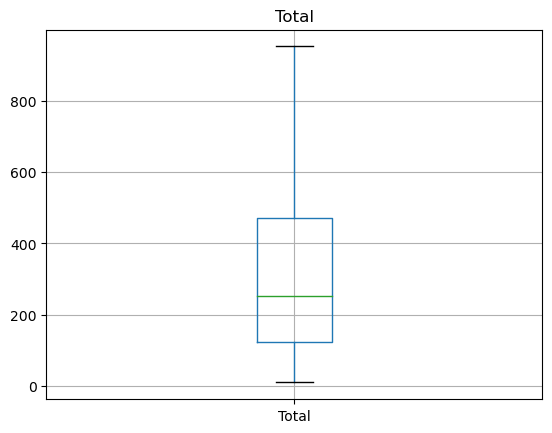

In [58]:
# We corroborate the result
db.boxplot(column = ['Total'])
plt.title('Total')
plt.show()

There were 9 outliers, so these were transformed into q1 and q3 as appropriate.

### Cogs

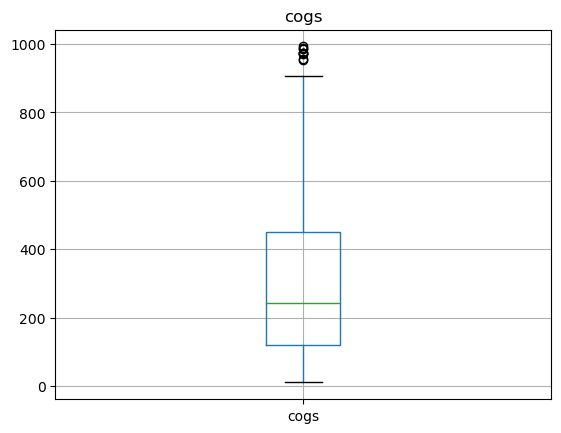

In [38]:
db.boxplot(column = ['cogs'])
plt.title('cogs')
plt.show()

In [53]:
q1 = db['cogs'].quantile(0.25)
q3 = db['cogs'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

# Calculating the number of outliers
q_outliers = db.loc[(db['cogs'] > (q3 + 1.5*iqr)) | (db['cogs'] < (q1 - 1.5*iqr))].shape[0]

# We replace the outliers greater than q3+15iqr, with the value of q3
db.loc[db['cogs'] > (q3 + 1.5*iqr), 'cogs'] = q3

# We replace the outliers less than q1-15iqr, with the value of q1
db.loc[db['cogs'] < (q1 - 1.5*iqr), 'cogs'] = q1

print(f'They were modified {q_outliers} outliers.')

They were modified 9 outliers.


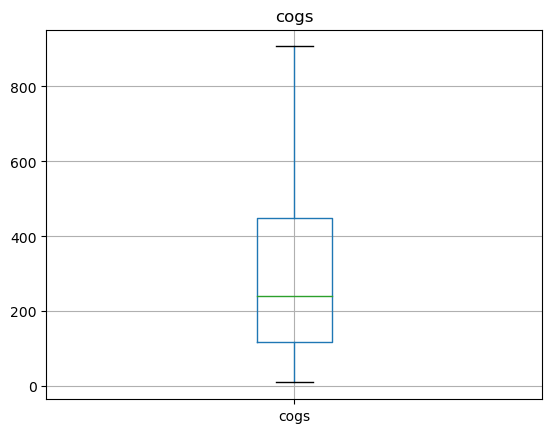

In [59]:
# We corroborate the result
db.boxplot(column = ['cogs'])
plt.title('cogs')
plt.show()

There were 9 outliers, so these were transformed into q1 and q3 as appropriate.

### Gross income

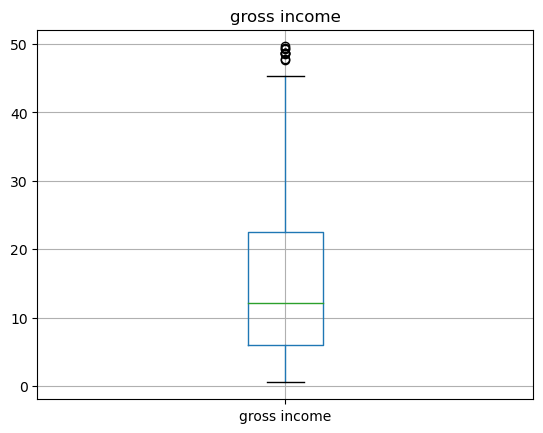

In [39]:
db.boxplot(column = ['gross income'])
plt.title('gross income')
plt.show()

In [54]:
q1 = db['gross income'].quantile(0.25)
q3 = db['gross income'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

# Calculating the number of outliers
q_outliers = db.loc[(db['gross income'] > (q3 + 1.5*iqr)) | (db['gross income'] < (q1 - 1.5*iqr))].shape[0]

# We replace the outliers greater than q3+15iqr, with the value of q3
db.loc[db['gross income'] > (q3 + 1.5*iqr), 'gross income'] = q3

# We replace the outliers less than q1-15iqr, with the value of q1
db.loc[db['gross income'] < (q1 - 1.5*iqr), 'gross income'] = q1

print(f'They were modified {q_outliers} outliers.')

They were modified 9 outliers.


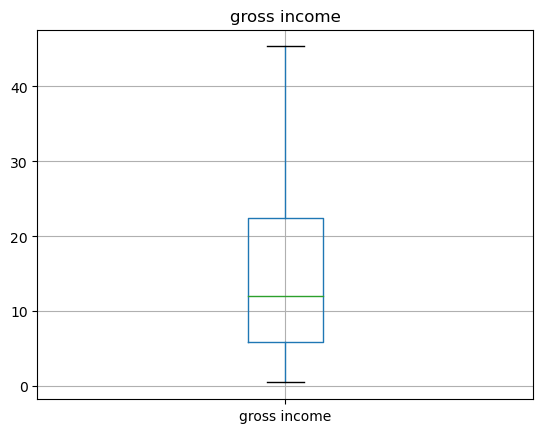

In [60]:
db.boxplot(column = ['gross income'])
plt.title('gross income')
plt.show()

In [ ]:
There were 9 outliers, so these were transformed into q1 and q3 as appropriate.

### Rating

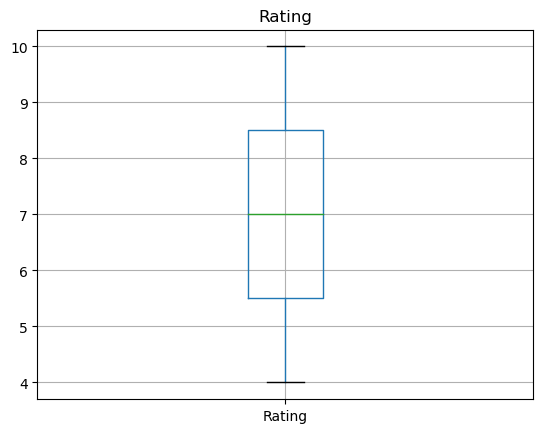

In [42]:
## We corroborate the result
db.boxplot(column = ['Rating'])
plt.title('Rating')
plt.show()

We see that there are no outliers that exceed the interquartile ranges.

## Categorical Variables

In [61]:
# We list categorical variables
db.select_dtypes(['object','category']).columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment'],
      dtype='object')

### Invoice

In [66]:
db['Invoice ID'].value_counts()

Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

These variable is different for each column, it is an ID.

### Branch

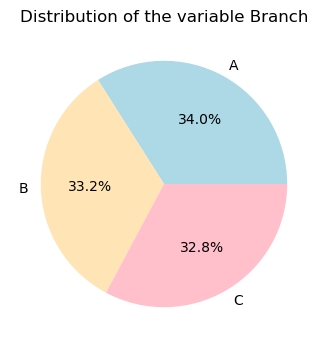

In [103]:
branch_percentage = db["Branch"].value_counts(normalize = True)*100
#Graph
plt.figure(figsize=(6,4))
branch_percentage.plot(kind='pie',autopct ='%1.1f%%',colors=['#ADD8E6', '#FFE4B5','#FFC0CB'])
plt.title("Distribution of the variable Branch")
plt.ylabel('')
plt.show()

Brand A stands out from the others with 34%

### City

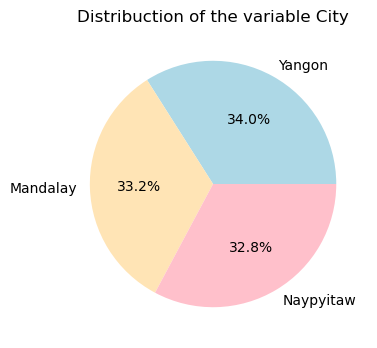

In [102]:
city_percentage = db["City"].value_counts(normalize=True)*100
#Graph
plt.figure(figsize=(6,4))
city_percentage.plot(kind='pie',autopct='%1.1f%%',colors=['#ADD8E6', '#FFE4B5','#FFC0CB'])
plt.title("Distribuction of the variable City")
plt.ylabel('')
plt.show()

Yangon has the hightest participation with 34%.

### Customer type

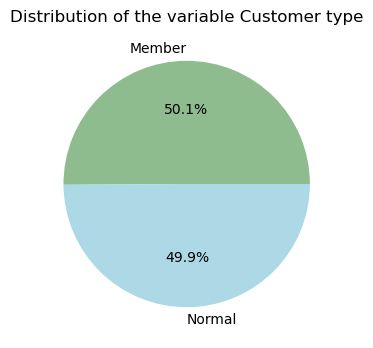

In [110]:
customer_percentage = db["Customer type"].value_counts(normalize=True)*100
#Graph
plt.figure(figsize=(6,4))
customer_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#8FBC8F','#ADD8E6'])
plt.title("Distribution of the variable Customer type")
plt.ylabel('')
plt.show()

The half of the sales were bought by member.

### Gender

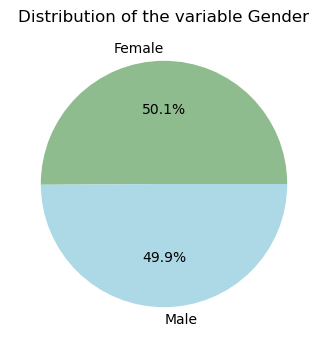

In [123]:
gender_percentage = db["Gender"].value_counts(normalize=True)*100
#Graph
plt.figure(figsize=(6,4))
gender_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#8FBC8F','#ADD8E6'])
plt.title("Distribution of the variable Gender")
plt.ylabel('')
plt.show()

The half of the sales were bought by female.

### Product line

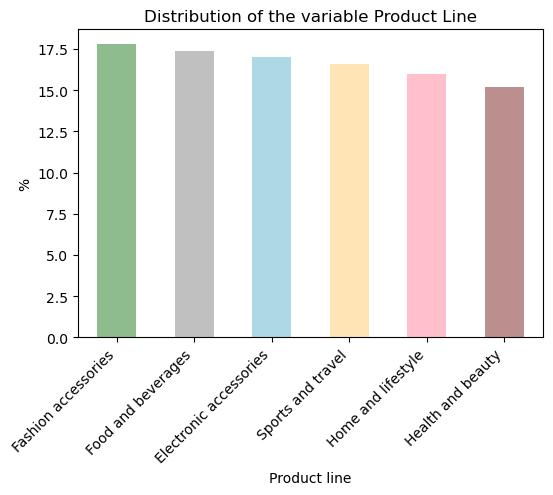

In [133]:
product_percentage = db['Product line'].value_counts(normalize=True)*100
#Graph
plt.figure(figsize=(6,4))
product_percentage.plot(kind='bar', color=['#8FBC8F', '#C0C0C0','#ADD8E6', '#FFE4B5','#FFC0CB','#BC8F8F'])
plt.title("Distribution of the variable Product Line")
plt.xlabel('Product line')
plt.ylabel('%')
plt.xticks(rotation=45, ha='right')
plt.show()

They highlight the highest categories such as Fashion accessories and Food and beverages.

### Payment

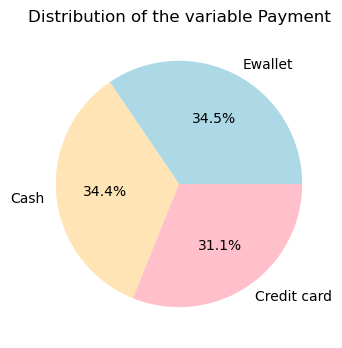

In [144]:
payment_percentage = db['Payment'].value_counts(normalize=True)*100
plt.figure(figsize=(6,4))
payment_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#ADD8E6', '#FFE4B5','#FFC0CB'])
plt.title("Distribution of the variable Payment")
plt.ylabel('')
plt.show()

The highest payment method is EWallet with 34.5%.

## Visualization between variables

### What is the branch with the highest sales?

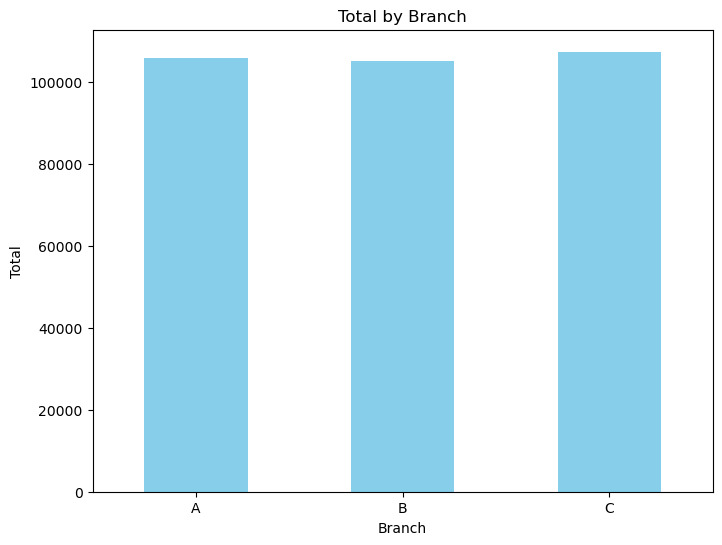

Branch
A    105632.43075
B    105095.49750
C    107269.53300
Name: Total, dtype: float64

In [162]:
branch_total = db.groupby('Branch')['Total'].sum()
#Graph
plt.figure(figsize=(8, 6))
branch_total.plot(kind='bar', color='skyblue')
plt.title('Total by Branch')
plt.xlabel('Branch')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.show()
branch_total

There is a slight difference between the branches. The hightest is Branch C.

### What is the branch with the highest incomes?

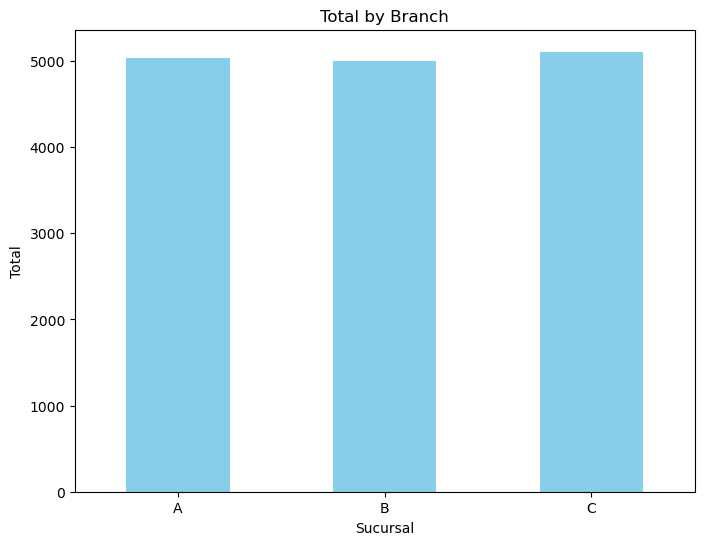

Branch
A    5030.11575
B    5004.54750
C    5108.07300
Name: gross income, dtype: float64

In [159]:
gross_branch = db.groupby('Branch')['gross income'].sum()
#Graph
plt.figure(figsize=(8, 6))
gross_branch.plot(kind='bar', color='skyblue')
plt.title('Total by Branch')
plt.xlabel('Sucursal')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.show()
gross_branch

In [160]:
5108.07300-5030.11575

77.95725000000039

The Branch with the hightest gross income is C, just for 77.96 dolars more.

### Customer Profile

In [182]:
branch_counts = db.groupby(['Gender', 'Customer type']).size().reset_index(name='count')

fig = px.sunburst(branch_counts, 
                  path=['Gender', 'Customer type'], 
                  values='count',
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

### What is the preferred payment method?

In [187]:
pay_counts = db.groupby(['Branch','Payment']).size().reset_index(name='count')

fig = px.sunburst(pay_counts, 
                  path=['Branch','Payment'], 
                  values='count',
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In Branch C, customers prefer to pay with cash. While in the other prefer Ewallets.

### What is the product category with the most gross income?

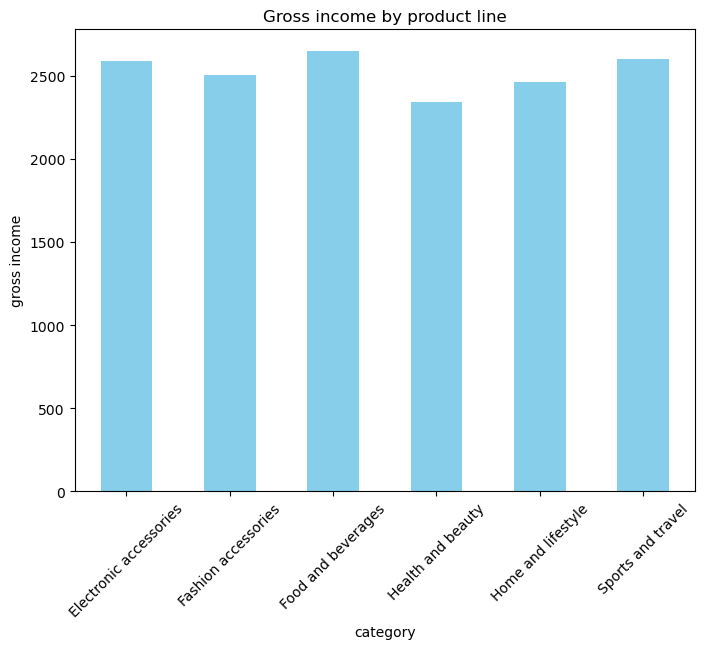

Product line
Electronic accessories    2587.50150
Fashion accessories       2505.58575
Food and beverages        2646.74925
Health and beauty         2342.55900
Home and lifestyle        2460.71900
Sports and travel         2599.62175
Name: gross income, dtype: float64

In [185]:
income_line = db.groupby('Product line')['gross income'].sum()
#Graph
plt.figure(figsize=(8, 6))
income_line.plot(kind='bar', color='skyblue')
plt.title('Gross income by product line')
plt.xlabel('category')
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.show()
income_line

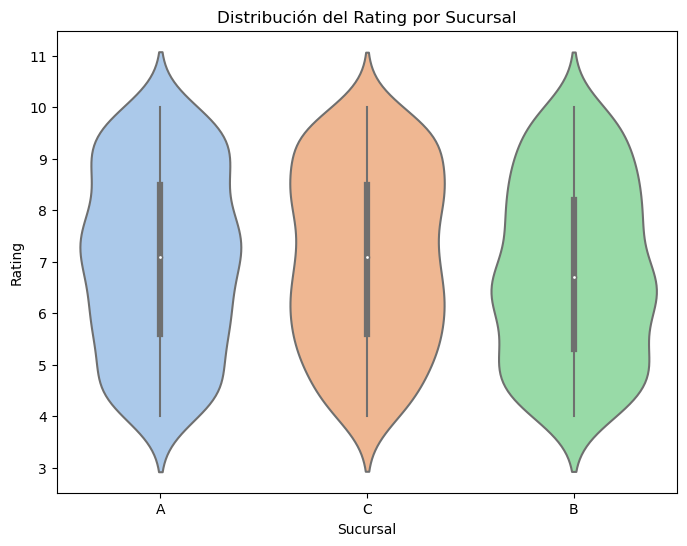

In [192]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Branch', y='Rating', data=db, palette='pastel')
plt.title('Distribución del Rating por Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Rating')
plt.show()

The mean lowest is branch B. However, the distribution of qualifications is almost the same.

## Stadistic analysis

In [189]:
db.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.142736,317.997461,2019-02-14 00:05:45.600000,2024-03-09 15:24:41.880000,302.854725,15.142736,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-03-09 10:00:00,10.170000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-03-09 12:43:00,118.497500,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-03-09 15:19:00,241.760000,12.088000,7.00000
75%,77.935000,8.000000,22.433813,471.110062,2019-03-08 00:00:00,2024-03-09 18:15:00,448.676250,22.433813,8.50000
max,99.960000,10.000000,45.325000,951.825000,2019-03-30 00:00:00,2024-03-09 20:59:00,906.500000,45.325000,10.00000
std,26.494628,2.923431,11.289890,237.087699,NaN,NaN,225.797808,11.289890,1.71858


In [193]:
correlation_matrix = db.corr()

print("Matriz de correlación:")
print(correlation_matrix)

ValueError: could not convert string to float: '750-67-8428'